# AUTHOR : GANESH S

### TASK 1 :  *PREDICTION USING SUPERVISED MACHINE LEARNING*

###  PROBLEM STATEMENT : 
- 1) predict the percentage of an student based on number of hours of study.                                          
- 2) What will be predicted score if student studies for 9.25hrs / day.?


### STEPS FOLLOWED FOR THIS TASK ARE AS FOLLOWS :

### STEP 1 : 
- IMPORTING THE LIBRARIES THAT ARE REQUIRED FOR DATA ANALYSIS AND VISUALIZATION

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### STEP 2 : 
**CREATION OF DATAFRAME USING ANY OF THE 2 METHODS GIVEN BELOW**

- From the url provided, saved i saved the link and changed its format to .csv for dataframe creation.

- An alternative approach to read this kind of data is to store the link in variable in your code and in the "pd.read_csv" function we have to pass the url variable name instead.

In [29]:
#CREATING A DATAFRAME AND SHOWING FIRST 10 DATA USING THE head function.
sc = pd.read_csv("student_scores.csv")
sc.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### STEP 3 :
CHECKING SKEWNESS FOR DIFFERENT FEATURES OF DATA

Skewness for the different features is as shown below: 
Hours     0.190338
Scores    0.233965
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


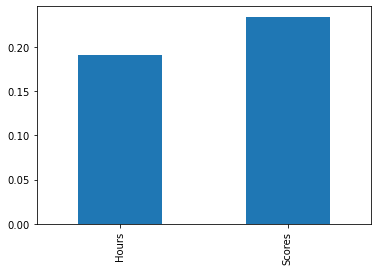

In [34]:
print("Skewness for the different features is as shown below: ")
print(sc.skew())
print(sc.skew().plot(kind="bar"))

### STEP 4 : SHAPE OF THE DATA
 
- From the this we can observe that the given dataset contains **25 rows** and **2 columns** respectively.

In [4]:
# Shape of the data
print("Shape of the data is: ",sc.shape)

Shape of the data is:  (25, 2)


### STEP 5 : THE pd.info() function

 - This step helps us to identify the current data types, number of columns etc. ofthe dataset.

In [6]:
print(sc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


### STEP 6: CHECKING NULL VALUES

- a)  This step is one of the most important steps as it helps us to find the columns which have null values and gives the count of missing entries in the dataset. based on its result we can decide for ourselves whether to fill those data with null values or drop them from the data as required.
- b) Here we can see that there are no null values in our dataset.

In [8]:
print(sc.isnull().sum())

Hours     0
Scores    0
dtype: int64


### STEP 7: ANALYZING SOME STATISTICAL VALUE OF THE DATA

#### THE DESCRIBE FUNCTION IS USED FOR A GENERAL STATISTICAL ANALYSIS OF DATA.

- a) For instance we can see the average or mean study **Hours** of the data is 5.01 and maximum for **Hours** is around 9.200 in the given data.

- b) Same can be inferred for other features as well.

In [5]:
print("Statistical Properties of the data are as follows: ")
(sc.describe())

Statistical Properties of the data are as follows: 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##   DATA VISUALIZATION

### STEP 8 : BAR GRAPH FOR HOURS VS SCORE OBTAINED

 ####  *GRAPH BELOW SHOWS THE PLOTTING FOR NUMBER OF HOURS OF STUDY VS THE PERCENTAGE(SCORE) OBTAINED BY THE STUDENT.*
- From the graph we can see that an average score of 50-60 is obtained by those students who have studied for 5-6 hrs a day. highest is for the who studied for almost 8.9 hrs a day got more than 85+ percent in the exams.

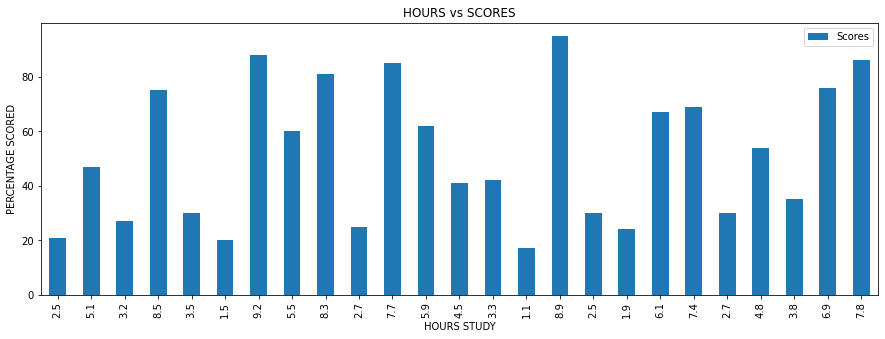

In [11]:
sc.plot(x="Hours",y="Scores",kind="bar",title="HOURS vs SCORES",figsize=(15,5))
plt.xlabel("HOURS STUDY")
plt.ylabel("PERCENTAGE SCORED")
plt.show()

### STEP 9: A BOXPLOT FOR CHECKING OUTLIERS

- through this boxplot for the Scores feature we see that there are no outliers for the same.

45.0


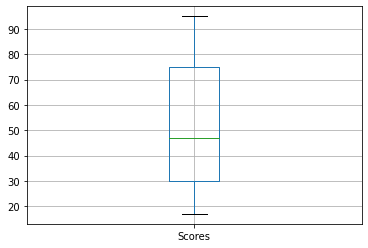

In [42]:
from scipy import stats
IQR = stats.iqr(sc.Scores, interpolation = "midpoint")
print(IQR)
sc.boxplot(column=["Scores"])

### STEP 10 : SCATTER PLOT for HOURS STUDY vs SCORES 
- From the graph we can see that there might be a linear relationship among the features.

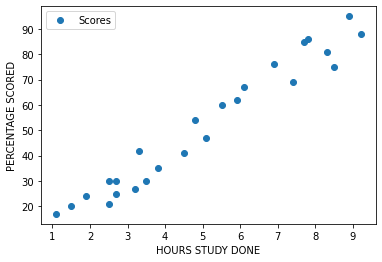

In [15]:
#sc.plot(x="Hours",y="Scores",kind="scatter",title="HOURS vs SCORES",style="0")
sc.plot(x="Hours",y="Scores",style="o")
plt.xlabel("HOURS STUDY DONE")
plt.ylabel("PERCENTAGE SCORED")
plt.show()

### STEP 11 : CHECKING THE CORRELATION
- This step helps us to identify how better the features are correlated with each other. The darker the shade/color in the heatmap, more is the correlation among the variables.

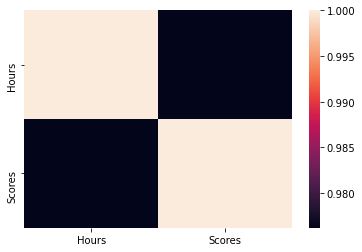

In [16]:
sns.heatmap(sc.corr())

### STEP 12 : MODEL BUILDING

- After the Analysis of the data, we are implementing the **LINEAR REGRESSION** model for the prediction of the score.

##### SPLITTING THE DATA INTO X and y i.e into "attributes(input)" & "labels(output)" respectively

In [18]:
# assigning X and y values.
X = sc.iloc[:,:-1].values
y = sc.iloc[:,1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Importing the libraries for splitting the dataset into train and test data.
- Here we are splitting the dataset into 80 % train data and 20 % for testing purpose.

In [19]:
from sklearn.model_selection import train_test_split 
# Separate into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=0)

#### Importing Linear regression model from scikit learn library.

- here the "regressor" variable contains the model and fit the train data on it for training of the model

In [47]:
from sklearn.linear_model import LinearRegression
#Instantiate linear regression model
regressor=LinearRegression()

# fit the model
regressor.fit(X_train,y_train)

# predict the result
y_pred = regressor.predict(X_test)

print("TRAINING OF THE MODEL DONE")


TRAINING OF THE MODEL DONE


#### THE GRAPH BELOW SHOWS A BAR CHART  AND A LINE CHART OF HOW THE PREDICTED AND ACTUAL VALUE IS AFTER THE MODEL IS TRAINED FOR BETTER VISUALIZATION.

- We can see that the actual value and predicted value by the model are very much close to each other. We can also infer that the accuracy metric of this model might be quite high as well.

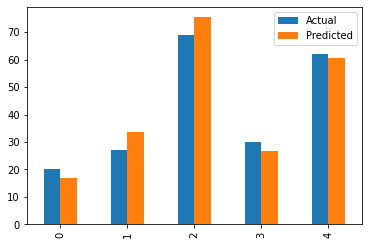

In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.plot(kind="bar")

[]

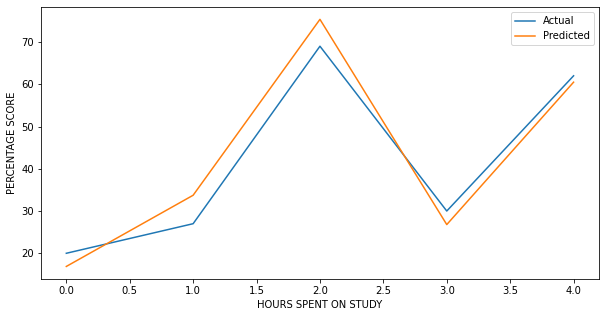

In [24]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df.plot(figsize=(10,5))
plt.xlabel("HOURS SPENT ON STUDY")
plt.ylabel("PERCENTAGE SCORE")
plt.plot()

####  THE 2 VISUALIZATIONS BELOW ARE FOR THE REGRESSION MODEL IN GRAPH FOR TRAIN DATA FOLLOWED BY TEST DATA.
- We can see that our model has predicted the values quite correctly for the both the data.

- This also shows that the model which we chose is the right one.

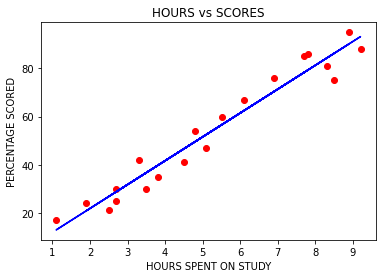

In [22]:
#plot for the TRAIN DATA
 
plt.scatter(X_train, y_train, color="red") # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color="blue") # plotting the regression line
 
plt.title("HOURS vs SCORES") # stating the title of the graph
 
plt.xlabel("HOURS SPENT ON STUDY") # adding the name of x-axis
plt.ylabel("PERCENTAGE SCORED") # adding the name of y-axis
plt.show()

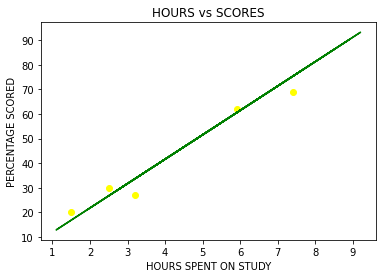

In [23]:
#PLOT FOR TEST DATA
plt.scatter(X_test, y_test, color="yellow") # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color="green") # plotting the regression line
 
plt.title("HOURS vs SCORES") # stating the title of the graph
 
plt.xlabel("HOURS SPENT ON STUDY") # adding the name of x-axis
plt.ylabel("PERCENTAGE SCORED") # adding the name of y-axis
plt.show()

#### TESTING MODEL FOR 9.25 hrs of STUDYING AS REQUIRED

In [59]:
hours = 9.25
pred = regressor.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score of the student for 9.25hrs/day = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score of the student for 9.25hrs/day = 93.69173248737538


THE ABOVE PREDICTION SHOWS THAT FOR A STUDENT STUDYING FOR **9.25 HRS/ DAY** HAS A PROBABILITY OF SCORING **93.691 % PERCENT** IN HIS EXAMS.

### STEP 13 : METRICS EVALUATION

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate mse
mse = mean_squared_error(y_test, y_pred)

# print mse
print("MEAN SQUARED ERROR : ",mse)

# Calculate r2_score for accuracy of model
r2 = r2_score(y_test, y_pred)

#print r2
print("ACCURACY FOR THIS MODEL:",r2)

#Calculating mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

MEAN SQUARED ERROR :  21.5987693072174
ACCURACY FOR THIS MODEL: 0.9454906892105356
Mean Absolute Error : 4.183859899002975


##  CONCLUSION :
- AFTER IMPLEMENTING THE LINEAR REGRESSION ALGORITHM ON THE SCORE DATA, I HAVE SUCCESSFULY PREDICTED THE PERCENTAGE THE STUDENT MIGHT SCORE IF HE STUDIES FOR **9.25 HOURS/DAY** WHICH IS **93.691**%. 

- THE ACCURACY FOR THE IMPLEMENTED MODEL IS 94 %.